# Red wine quality a polynomial regression approach

## Introduction

Red wine is a type of wine made from dark-colored grape varieties. The actual color of the wine can range from intense violet, typical of young wines, through to brick red for mature wines and brown for older red wines.In this project we are going to explore quality of with respect to amount of different content.We will also discover how much quality of red wine depends upon these contents.Lastly we will model a relationship between these quantities and quality of red wine

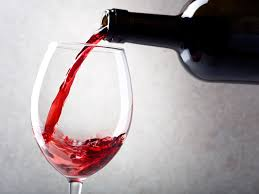

# Libraries

We will be needing following libraries, 
- Scikitlearn
- pandas
- matplotlib

## Scikitlearn: 
Now the relationship between quality of wine and different content inside the wine can be modeled using a statistical technique known as Regression.Here we will use its variant known as polynomial regression as tool for modelling the relationship between redwine and various contents that are used in production of redwine.
## Pandas: 
Pandas is an amazing data handling and data wrangling tool that makes our job a lot easier and efficent compared to normal file opeing using trivial open code.Pandas come with several builtin function that allow exploratory data analysis and preprocessing a lot easier.

### Importing libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

### Exploratory data analysis and Preprocessing

In [5]:
data_set=pd.read_csv('winequality-red.csv',delimiter=';')
data_set.head()
#X,y,X_test,y_test=train_test_split()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking for null values
data_set.isnull()
#dropping null values 
data_set.dropna()
#forward filling null values
data_set.fillna(method='ffill')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


(array([638.,   0.,   0.,   0.,   0., 199.,   0.,   0.,   0.,  18.]),
 array([6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. ]),
 <a list of 10 Patch objects>)

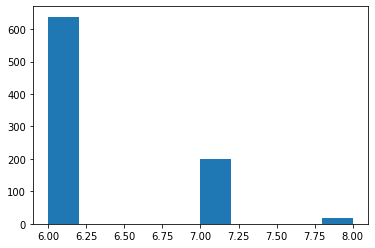

In [7]:
#checking average quality of wine in data
#checking the distribution of this data
plt.hist(data_set[data_set['quality']>data_set['quality'].mean()].quality.values)

(array([ 10.,   0.,   0.,   0.,   0.,  53.,   0.,   0.,   0., 681.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

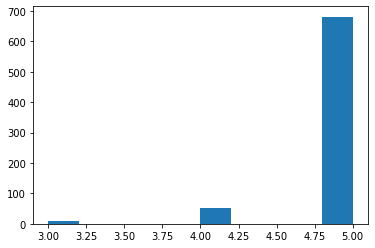

In [8]:
# checking lowest quality wines in our data set
#checking distribution of this data
plt.hist(data_set[data_set['quality']<data_set['quality'].mean()].quality.values)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

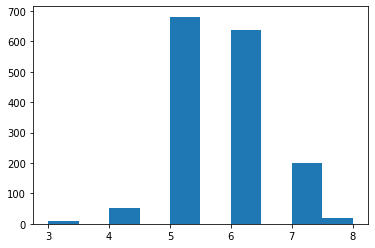

In [9]:
#checking distribution of qulaity of wines
plt.hist(data_set.quality.values)

## Distribution

It appears that our data is quiet uniformly distributed.It follows normal distribution and apparantly 5 is average of quality from given data set.

## Splitting data set

In [10]:
#First split explanatory variable and Output variable
y = data_set[['quality']]
# All the input parameters used to predict the value are represented as y.
X =data_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
#X=data_set.iloc[:,:-1]
#y=data_set.iloc[:,-1:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1316,5.4,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5
1199,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5
153,7.5,0.600,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.1
1485,7.0,0.655,0.16,2.1,0.074,8.0,25.0,0.99606,3.37,0.55,9.7
368,10.3,0.340,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.4


## Feature Scaling

In [11]:
scale=StandardScaler()
scale.fit_transform(X_train)
scale.fit_transform(y_train)
scale.fit_transform(X_test)
scale.fit_transform(y_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Polynomial Features

In [ ]:
features=PolynomialFeatures(degree=3)
features.fit_transform()

## Setting degree of polynomial

In [12]:
Model=SVC(kernel='poly',degree=3,C=.2,gamma=1.1)

# Fitting model

In [ ]:
Model.fit(X_train,y_train)

/home/rufus/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Training set error

In [ ]:
y_predict=Model.predict(X_train)
predicted_data = np.round_(y_predict)
print(accuracy_score(y_train,predicted_data))
print(precision_score(y_train,predicted_data))
print(recall_score(y_train,predicted_data))

# Test set error

In [ ]:
y_predict=Model.predict(X_test)
print(accuracy_score(y_predict,y_test))